In [ ]:
#@title import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import matplotlib.patches as mpatches
import os
import ipywidgets as widgets
from IPython.display import display, clear_output
import argparse
import sys
import argparse
from IPython.display import clear_output
from scipy.stats import ranksums
for i in range(5):
    clear_output(wait=True)
    print("Finished loading libraries!")

Finished loading libraries!


In [ ]:
#@title load functions
def filter_vcf(file_name,SV_tool,SV_type,min_depth,max_depth,SV_length_min,SV_length_max,sample):
  with open(file_name) as oldfile, open(file_name+'.temp', 'w') as newfile:
    for line in oldfile:
      line = "" if "#" in line or not line else line
      newfile.write(line)
  #vcf_wildtype=pd.read_csv('vcf_wildtype_temp.txt',sep="\t",header=None)
  #vcf_mutant=pd.read_csv('vcf_mutant_temp.txt',sep="\t",header=None)
  vcf=pd.read_csv(file_name+'.temp',sep="\t",header=None)
  if SV_tool =='sniffles':
  	vcf['DB']=vcf[7].str.split('SUPPORT=',expand=True)[1].str.split(';',expand=True)[0].astype('int') #vcf[9].str.split(':',expand=True)[3].astype(int)
  if SV_tool =='cuteSV':
    vcf['DB']=vcf[7].str.split('RE=',expand=True)[1].str.split(';',expand=True)[0].astype('int') #vcf[9].str.split(':',expand=True)[2].astype(int)
  vcf['SVTYPE']=vcf[7].str.split('SVTYPE=',expand=True)[1].str.split(';',expand=True)[0]
  vcf['SVLEN']=vcf[7].str.split('SVLEN=',expand=True)[1].str.split(';',expand=True)[0]#.astype(int)
  vcf=vcf.dropna(subset = ['SVLEN'])
  vcf=vcf[vcf['SVTYPE']==SV_type]
  vcf['SVLEN']=np.abs(vcf['SVLEN'].astype(int))
  if int(min_depth)==int(max_depth):
          vcf=vcf[(vcf['DB']==int(min_depth))]
  if int(min_depth)<int(max_depth):
          vcf=vcf[(vcf['DB']>=int(min_depth))&(vcf['DB']<=int(max_depth))]
  vcf=vcf[(vcf['SVLEN']<int(SV_length_max))&(vcf['SVLEN']>=int(SV_length_min))]
  vcf.to_csv(str(sample)+"_filtered"+"_"+SV_tool+"_"+SV_type+"_"+min_depth+"_"+max_depth+"_"+SV_length_min+"_"+SV_length_max+"_temp.txt",index=False,header=None,sep="\t")
  with open(file_name) as oldfile, open(str(sample)+"_filtered"+"_"+SV_tool+"_"+SV_type+"_"+min_depth+"_"+max_depth+"_"+SV_length_min+"_"+SV_length_max+".vcf", 'w') as newfile:
    for line in oldfile:
        if '#' in line:
            newfile.write(line)
        else:
            line=""
  with open(str(sample)+"_filtered"+"_"+SV_tool+"_"+SV_type+"_"+min_depth+"_"+max_depth+"_"+SV_length_min+"_"+SV_length_max+"_temp.txt") as oldfile, open(str(sample)+"_filtered"+"_"+SV_tool+"_"+SV_type+"_"+min_depth+"_"+max_depth+"_"+SV_length_min+"_"+SV_length_max+".vcf", 'a') as newfile:
      for line in oldfile:
        newfile.write(line)
  os.remove(file_name+'.temp')
  #os.remove(str(sample)+"_filtered"+"_"+SV_tool+"_"+SV_type+"_"+min_depth+"_"+max_depth+"_"+SV_length_min+"_"+SV_length_max+".txt")
  os.remove(str(sample)+"_filtered"+"_"+SV_tool+"_"+SV_type+"_"+min_depth+"_"+max_depth+"_"+SV_length_min+"_"+SV_length_max+"_temp.txt")
  return vcf
def get_values(vcf_mutant_g,vcf_control_g,chr_len):
  xI2=pd.DataFrame(np.histogram(vcf_mutant_g[vcf_mutant_g[0]=='I'][1],bins=np.arange(0,chr_len[chr_len[0]=='I'][4].iloc[0],300000))).T[0].fillna(0)#,label='mutant',color='orange')
  xI1=pd.DataFrame(np.histogram(vcf_control_g[vcf_control_g[0]=='I'][1],bins=np.arange(0,chr_len[chr_len[0]=='I'][4].iloc[0],300000))).T[0].fillna(0)#,label='wildtype',color='grey')
  xII2=pd.DataFrame(np.histogram(vcf_mutant_g[vcf_mutant_g[0]=='II'][1],bins=np.arange(0,chr_len[chr_len[0]=='II'][4].iloc[0],300000))).T[0].fillna(0)#,label='mutant',color='orange')
  xII1=pd.DataFrame(np.histogram(vcf_control_g[vcf_control_g[0]=='II'][1],bins=np.arange(0,chr_len[chr_len[0]=='II'][4].iloc[0],300000))).T[0].fillna(0)#,label='wildtype',color='grey')
  xIII2=pd.DataFrame(np.histogram(vcf_mutant_g[vcf_mutant_g[0]=='III'][1],bins=np.arange(0,chr_len[chr_len[0]=='III'][4].iloc[0],300000))).T[0].fillna(0)#,label='mutant',color='orange')
  xIII1=pd.DataFrame(np.histogram(vcf_control_g[vcf_control_g[0]=='III'][1],bins=np.arange(0,chr_len[chr_len[0]=='III'][4].iloc[0],300000))).T[0].fillna(0)#,label='wildtype',color='grey')
  xIV2=pd.DataFrame(np.histogram(vcf_mutant_g[vcf_mutant_g[0]=='IV'][1],bins=np.arange(0,chr_len[chr_len[0]=='IV'][4].iloc[0],300000))).T[0].fillna(0)#,label='mutant',color='orange')
  xIV1=pd.DataFrame(np.histogram(vcf_control_g[vcf_control_g[0]=='IV'][1],bins=np.arange(0,chr_len[chr_len[0]=='IV'][4].iloc[0],300000))).T[0].fillna(0)#,label='wildtype',color='grey')
  xV2=pd.DataFrame(np.histogram(vcf_mutant_g[vcf_mutant_g[0]=='V'][1],bins=np.arange(0,chr_len[chr_len[0]=='V'][4].iloc[0],300000))).T[0].fillna(0)#,label='mutant',color='orange')
  xV1=pd.DataFrame(np.histogram(vcf_control_g[vcf_control_g[0]=='V'][1],bins=np.arange(0,chr_len[chr_len[0]=='V'][4].iloc[0],300000))).T[0].fillna(0)#,label='wildtype',color='grey')
  xX2=pd.DataFrame(np.histogram(vcf_mutant_g[vcf_mutant_g[0]=='X'][1],bins=np.arange(0,chr_len[chr_len[0]=='X'][4].iloc[0],300000))).T[0].fillna(0)#,label='mutant',color='orange')
  xX1=pd.DataFrame(np.histogram(vcf_control_g[vcf_control_g[0]=='X'][1],bins=np.arange(0,chr_len[chr_len[0]=='X'][4].iloc[0],300000))).T[0].fillna(0)#,label='wildtype',color='grey')
  all_arr = [np.concatenate([xI2,xII2,xIII2,xIV2,xV2,xX2]),np.concatenate([xI1,xII1,xIII1,xIV1,xV1,xX1])]
  return pd.DataFrame(all_arr).T
#@title Plot enrichment
def filter_vcf_enrichment(file_name,SV_tool,min_depth,max_depth,SV_length_min,sample):
  with open(file_name) as oldfile, open(file_name+'.temp', 'w') as newfile:
    for line in oldfile:
      line = "" if "#" in line or not line else line
      newfile.write(line)
  #vcf_wildtype=pd.read_csv('vcf_wildtype_temp.txt',sep="\t",header=None)
  #vcf_mutant=pd.read_csv('vcf_mutant_temp.txt',sep="\t",header=None)
  vcf=pd.read_csv(file_name+'.temp',sep="\t",header=None)
  if SV_tool =='sniffles':
  	vcf['DB']=vcf[7].str.split('SUPPORT=',expand=True)[1].str.split(';',expand=True)[0].astype('int') #vcf[9].str.split(':',expand=True)[3].astype(int)
  if SV_tool =='cuteSV':
    vcf['DB']=vcf[7].str.split('RE=',expand=True)[1].str.split(';',expand=True)[0].astype('int') #vcf[9].str.split(':',expand=True)[2].astype(int)
  vcf['SVTYPE']=vcf[7].str.split('SVTYPE=',expand=True)[1].str.split(';',expand=True)[0]
  vcf['SVLEN']=vcf[7].str.split('SVLEN=',expand=True)[1].str.split(';',expand=True)[0]#.astype(int)
  vcf['SVLEN']=vcf['SVLEN'].fillna(SV_length_min)
  #vcf=vcf.dropna(subset = ['SVLEN'])
  #vcf=vcf[vcf['SVTYPE']==SV_type]
  vcf['SVLEN']=np.abs(vcf['SVLEN'].astype(int))
  if int(min_depth)==int(max_depth):
          vcf=vcf[(vcf['DB']==int(min_depth))]
  if int(min_depth)<int(max_depth):
          vcf=vcf[(vcf['DB']>=int(min_depth))&(vcf['DB']<=int(max_depth))]
  vcf=vcf[(vcf['SVLEN']>=int(SV_length_min))]
  vcf.to_csv(str(sample)+"_filtered_enr"+"_"+SV_tool+"_"+"_"+min_depth+"_"+max_depth+"_"+SV_length_min+"_"+"_temp.txt",index=False,header=None,sep="\t")
  with open(file_name) as oldfile, open(str(sample)+"_filtered_enr"+"_"+SV_tool+"_"+"_"+min_depth+"_"+max_depth+"_"+SV_length_min+"_"+".vcf", 'w') as newfile:
    for line in oldfile:
        if '#' in line:
            newfile.write(line)
        else:
            line=""
  with open(str(sample)+"_filtered_enr"+"_"+SV_tool+"_"+"_"+min_depth+"_"+max_depth+"_"+SV_length_min+"_"+"_temp.txt") as oldfile, open(str(sample)+"_filtered_enr"+"_"+SV_tool+"_"+"_"+min_depth+"_"+max_depth+"_"+SV_length_min+"_"+".vcf", 'a') as newfile:
      for line in oldfile:
        newfile.write(line)
  os.remove(file_name+'.temp')
  #os.remove(str(sample)+"_filtered"+"_"+SV_tool+"_"+SV_type+"_"+min_depth+"_"+max_depth+"_"+SV_length_min+"_"+SV_length_max+".txt")
  os.remove(str(sample)+"_filtered_enr"+"_"+SV_tool+"_"+"_"+min_depth+"_"+max_depth+"_"+SV_length_min+"_"+"_temp.txt")
  return vcf
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"
def iqr_fence(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (1.5 * IQR)
    Upper_Fence = Q3 + (1.5 * IQR)
    return Upper_Fence
for i in range(5):
    clear_output(wait=True)
    print("Finished loading functions!")

Finished loading functions!


In [ ]:
#@title download vcf files (takes around 10 minutes, sometimes longer)
!wget https://seafile.ist.ac.at/f/360a103bcd274aa9aef4/?dl=1 -O alignment_315848_cuteSV.vcf
!wget https://seafile.ist.ac.at/f/77b3e1d10d7d468eb63d/?dl=1 -O alignment_315850_cuteSV.vcf
!wget https://seafile.ist.ac.at/f/9e365347a38d4b3685d0/?dl=1 -O alignment_315848_sniffles.vcf
!wget https://seafile.ist.ac.at/f/c88ce6ab84e8458aa302/?dl=1 -O alignment_315850_sniffles.vcf
!wget https://seafile.ist.ac.at/f/c59c52c97ca144a296ca/?dl=1 -O chromosome_lengths.txt
chr_length=pd.read_csv('chromosome_lengths.txt',sep="\s+",header=None)
for i in range(5):
    clear_output(wait=True)
    print("Finished downloading files!")

Finished downloading files!


In [ ]:
#@title Specify the parameters for the next plot after you see the message: You can specify the parameters now!
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        print("changed to %s" % change['new'])
SV_tool_arg_v0 = widgets.Dropdown(
    options=['cuteSV', 'sniffles'],
    value='cuteSV',
    description='SV calling tool:',style={'description_width': 'initial'}
)
display(SV_tool_arg_v0)
SV_tool_arg_v0.observe(on_change)
min_depth_arg_v0=widgets.Text(
    value='1',
    placeholder='Type a number',
    description='Minimum depth:',style={'description_width': 'initial'},
    disabled=False
)
display(min_depth_arg_v0)
min_depth_arg_v0.observe(on_change)
max_depth_arg_v0=widgets.Text(
    value='1',
    placeholder='Type a number',
    description='Maximum depth:',style={'description_width': 'initial'},
    disabled=False
)
display(max_depth_arg_v0)
SV_length_min_arg_v0=widgets.Text(
    value='1000',
    placeholder='Type a number',
    description='Minimum length:',style={'description_width': 'initial'},
    disabled=False
)
display(SV_length_min_arg_v0)
SV_length_min_arg_v0.observe(on_change)

Dropdown(description='SV calling tool:', options=('cuteSV', 'sniffles'), style=DescriptionStyle(description_wi…

Text(value='1', description='Minimum depth:', placeholder='Type a number', style=DescriptionStyle(description_…

Text(value='1', description='Maximum depth:', placeholder='Type a number', style=DescriptionStyle(description_…

Text(value='1000', description='Minimum length:', placeholder='Type a number', style=DescriptionStyle(descript…

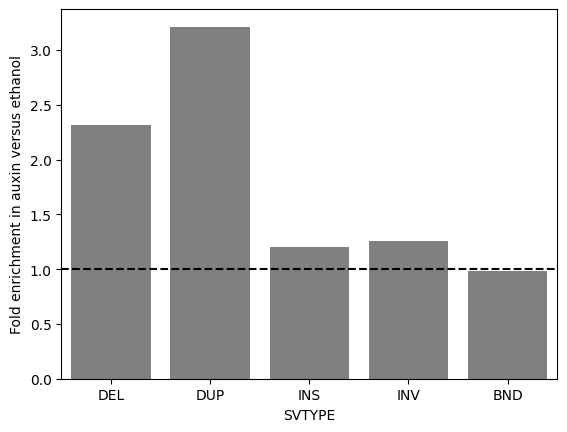

In [ ]:
# Calculate control and mutant counts
control_counts = filter_vcf_enrichment("alignment_315848_"+SV_tool_arg_v0.value+".vcf",SV_tool_arg_v0.value,min_depth_arg_v0.value,max_depth_arg_v0.value,SV_length_min_arg_v0.value,'vcf_control')['SVTYPE'].value_counts().reset_index()
mutant_counts = filter_vcf_enrichment("alignment_315850_"+SV_tool_arg_v0.value+".vcf",SV_tool_arg_v0.value,min_depth_arg_v0.value,max_depth_arg_v0.value,SV_length_min_arg_v0.value,'vcf_mutant')['SVTYPE'].value_counts().reset_index()
merged_counts = pd.merge(control_counts.set_index('SVTYPE').reindex(['DEL', 'DUP', 'INS', 'INV','BND']),
                         mutant_counts.set_index('SVTYPE').reindex(['DEL', 'DUP', 'INS', 'INV','BND']),
                         on='SVTYPE')
merged_counts['Fold enrichment in auxin versus ethanol'] = merged_counts['count_y']/merged_counts['count_x']

# Plotting
sns.barplot((merged_counts['Fold enrichment in auxin versus ethanol']), color='grey')
plt.axhline(y=1, color='black', linestyle='dashed')
plot_filename = SV_tool_arg_v0.value+"_"+min_depth_arg_v0.value+"_"+max_depth_arg_v0.value+"_"+SV_length_min_arg_v0.value+"_fold_enrichment.png"
plt.savefig(plot_filename, bbox_inches='tight', dpi=500)

# Save data for plotting to a text file
data_filename = plot_filename.replace('.png', '.txt')
merged_counts.to_csv(data_filename, sep='\t', index=False)

In [ ]:
#@title Specify the parameters for the next plot
SV_tool_arg_v1 = widgets.Dropdown(
    options=['cuteSV', 'sniffles'],
    value='cuteSV',
    description='SV calling tool:',style={'description_width': 'initial'},layout={'width': 'max-content'}
)
display(SV_tool_arg_v1)
SV_type_arg_v1 = widgets.Dropdown(
    options=['DEL', 'DUP', 'INS','INV'],
    value='DEL',
    description='SV TYPE:',style={'description_width': 'initial'},layout={'width': 'max-content'}
)
display(SV_type_arg_v1)
min_depth_arg_v1=widgets.Text(
    value='1',
    placeholder='Type a number',
    description='Minimum depth:',
    disabled=False,style={'description_width': 'initial'},layout={'width': 'max-content'}
)
display(min_depth_arg_v1)
max_depth_arg_v1=widgets.Text(
    value='1',
    placeholder='Type a number',
    description='Maximum depth:',
    disabled=False,style={'description_width': 'initial'},layout={'width': 'max-content'}
)
display(max_depth_arg_v1)
SV_length_min_arg_w1_v1=widgets.Text(
    value='1000',
    placeholder='Type a number',
    description='Minimum length window 1:',
    disabled=False,style={'description_width': 'initial'},layout={'width': 'max-content'}
)
display(SV_length_min_arg_w1_v1)
SV_length_max_arg_w1_v1=widgets.Text(
    value='10000',
    placeholder='Type a number',
    description='Maximum length window 1:',style={'description_width': 'initial'},layout={'width': 'max-content'}
)
display(SV_length_max_arg_w1_v1)
SV_length_min_arg_w2_v1=widgets.Text(
    value='10000',
    placeholder='Type a number',
    description='Mininimum length window 2:',
    disabled=False,style={'description_width': 'initial'},layout={'width': 'max-content'}
)
display(SV_length_min_arg_w2_v1)
SV_length_max_arg_w2_v1=widgets.Text(
    value='50000',
    placeholder='Type a number',
    description='Maximum length window 2:',style={'description_width': 'initial'},layout={'width': 'max-content'}
)
display(SV_length_max_arg_w2_v1)
SV_length_min_arg_w3_v1=widgets.Text(
    value='50000',
    placeholder='Type a number',
    description='Minimum length window 3:',
    disabled=False,style={'description_width': 'initial'},layout={'width': 'max-content'}
)
display(SV_length_min_arg_w3_v1)
SV_length_max_arg_w3_v1=widgets.Text(
    value='100000',
    placeholder='Type a number',
    description='Maximum length window 3:',style={'description_width': 'initial'},layout={'width': 'max-content'}
)
display(SV_length_max_arg_w3_v1)
print("You can specify the parameters now!")

Dropdown(description='SV calling tool:', layout=Layout(width='max-content'), options=('cuteSV', 'sniffles'), s…

Dropdown(description='SV TYPE:', layout=Layout(width='max-content'), options=('DEL', 'DUP', 'INS', 'INV'), sty…

Text(value='1', description='Minimum depth:', layout=Layout(width='max-content'), placeholder='Type a number',…

Text(value='1', description='Maximum depth:', layout=Layout(width='max-content'), placeholder='Type a number',…

Text(value='1000', description='Minimum length window 1:', layout=Layout(width='max-content'), placeholder='Ty…

Text(value='10000', description='Maximum length window 1:', layout=Layout(width='max-content'), placeholder='T…

Text(value='10000', description='Mininimum length window 2:', layout=Layout(width='max-content'), placeholder=…

Text(value='50000', description='Maximum length window 2:', layout=Layout(width='max-content'), placeholder='T…

Text(value='50000', description='Minimum length window 3:', layout=Layout(width='max-content'), placeholder='T…

Text(value='100000', description='Maximum length window 3:', layout=Layout(width='max-content'), placeholder='…

You can specify the parameters now!


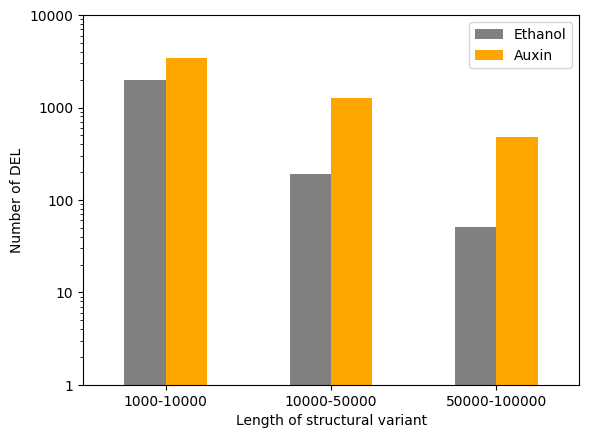

In [ ]:
# Filter VCF data
vcf_mutant_filtered_w1_v1 = filter_vcf("alignment_315850_"+SV_tool_arg_v1.value+".vcf", SV_tool_arg_v1.value, SV_type_arg_v1.value, min_depth_arg_v1.value, max_depth_arg_v1.value, SV_length_min_arg_w1_v1.value, SV_length_max_arg_w1_v1.value, 'vcf_mutant')
vcf_control_filtered_w1_v1 = filter_vcf("alignment_315848_"+SV_tool_arg_v1.value+".vcf", SV_tool_arg_v1.value, SV_type_arg_v1.value, min_depth_arg_v1.value, max_depth_arg_v1.value, SV_length_min_arg_w1_v1.value, SV_length_max_arg_w1_v1.value, 'vcf_wildtype')
vcf_mutant_filtered_w2_v1 = filter_vcf("alignment_315850_"+SV_tool_arg_v1.value+".vcf", SV_tool_arg_v1.value, SV_type_arg_v1.value, min_depth_arg_v1.value, max_depth_arg_v1.value, SV_length_min_arg_w2_v1.value, SV_length_max_arg_w2_v1.value, 'vcf_mutant')
vcf_control_filtered_w2_v1 = filter_vcf("alignment_315848_"+SV_tool_arg_v1.value+".vcf", SV_tool_arg_v1.value, SV_type_arg_v1.value, min_depth_arg_v1.value, max_depth_arg_v1.value, SV_length_min_arg_w2_v1.value, SV_length_max_arg_w2_v1.value, 'vcf_wildtype')
vcf_mutant_filtered_w3_v1 = filter_vcf("alignment_315850_"+SV_tool_arg_v1.value+".vcf", SV_tool_arg_v1.value, SV_type_arg_v1.value, min_depth_arg_v1.value, max_depth_arg_v1.value, SV_length_min_arg_w3_v1.value, SV_length_max_arg_w3_v1.value, 'vcf_mutant')
vcf_control_filtered_w3_v1 = filter_vcf("alignment_315848_"+SV_tool_arg_v1.value+".vcf", SV_tool_arg_v1.value, SV_type_arg_v1.value, min_depth_arg_v1.value, max_depth_arg_v1.value, SV_length_min_arg_w3_v1.value, SV_length_max_arg_w3_v1.value, 'vcf_wildtype')

# Prepare data for plotting
plot_data = pd.DataFrame(
    [
        [len(vcf_control_filtered_w1_v1), len(vcf_control_filtered_w2_v1), len(vcf_control_filtered_w3_v1)],
        [len(vcf_mutant_filtered_w1_v1), len(vcf_mutant_filtered_w2_v1), len(vcf_mutant_filtered_w3_v1)]
    ],
    columns=[
        str(SV_length_min_arg_w1_v1.value)+'-'+str(SV_length_max_arg_w1_v1.value),
        str(SV_length_min_arg_w2_v1.value)+'-'+str(SV_length_max_arg_w2_v1.value),
        str(SV_length_min_arg_w3_v1.value)+'-'+str(SV_length_max_arg_w3_v1.value)
    ]
).T.rename(columns={0: "Ethanol", 1: "Auxin"})

# Plotting
plot_filename = "boxplot_windows" + "_" + SV_tool_arg_v1.value + "_" + SV_type_arg_v1.value + "_" + min_depth_arg_v1.value + "_" + max_depth_arg_v1.value + "_" + SV_length_min_arg_w1_v1.value + "_" + SV_length_max_arg_w1_v1.value + "_" + SV_length_min_arg_w2_v1.value + "_" + SV_length_max_arg_w2_v1.value + "_" + SV_length_min_arg_w3_v1.value + "_" + SV_length_max_arg_w3_v1.value + ".png"
plot_data.plot.bar(color=['grey', 'orange'], rot=0)
plt.yscale("log")
plt.yticks([1, 10, 100, 1000, 10000], ["1", "10", "100", "1000", "10000"])
plt.ylabel("Number of " + str(SV_type_arg_v1.value))
plt.xlabel("Length of structural variant")
plt.savefig(plot_filename, bbox_inches='tight', dpi=300)

# Save data to a text file
data_filename = plot_filename.replace('.png', '.txt')
plot_data.to_csv(data_filename, sep='\t', index=True)

In [ ]:
#@title Specify the parameters for the next plot after you see the message: You can specify the parameters now!
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        print("changed to %s" % change['new'])
SV_tool_arg = widgets.Dropdown(
    options=['cuteSV', 'sniffles'],
    value='cuteSV',
    description='SV calling tool:',style={'description_width': 'initial'}
)
SV_tool_arg.observe(on_change)
display(SV_tool_arg)
SV_type_arg = widgets.Dropdown(
    options=['DEL', 'DUP', 'INS','INV'],
    value='DEL',
    description='SV TYPE:',
)
display(SV_type_arg)
SV_type_arg.observe(on_change)
min_depth_arg=widgets.Text(
    value='1',
    placeholder='Type a number',
    description='Minimum depth:',style={'description_width': 'initial'},
    disabled=False
)
display(min_depth_arg)
min_depth_arg.observe(on_change)
max_depth_arg=widgets.Text(
    value='1',
    placeholder='Type a number',
    description='Maximum depth:',style={'description_width': 'initial'},
    disabled=False
)
display(max_depth_arg)
max_depth_arg.observe(on_change)
SV_length_min_arg=widgets.Text(
    value='1000',
    placeholder='Type a number',
    description='Minimum length:',style={'description_width': 'initial'},
    disabled=False
)
display(SV_length_min_arg)
SV_length_min_arg.observe(on_change)
SV_length_max_arg=widgets.Text(
    value='10000',
    placeholder='Type a number',
    description='Maximum length:',style={'description_width': 'initial'},
    disabled=False
)
display(SV_length_max_arg)
SV_length_max_arg.observe(on_change)
print("You can specify the parameters now!")

Dropdown(description='SV calling tool:', options=('cuteSV', 'sniffles'), style=DescriptionStyle(description_wi…

Dropdown(description='SV TYPE:', options=('DEL', 'DUP', 'INS', 'INV'), value='DEL')

Text(value='1', description='Minimum depth:', placeholder='Type a number', style=DescriptionStyle(description_…

Text(value='1', description='Maximum depth:', placeholder='Type a number', style=DescriptionStyle(description_…

Text(value='1000', description='Minimum length:', placeholder='Type a number', style=DescriptionStyle(descript…

Text(value='10000', description='Maximum length:', placeholder='Type a number', style=DescriptionStyle(descrip…

You can specify the parameters now!


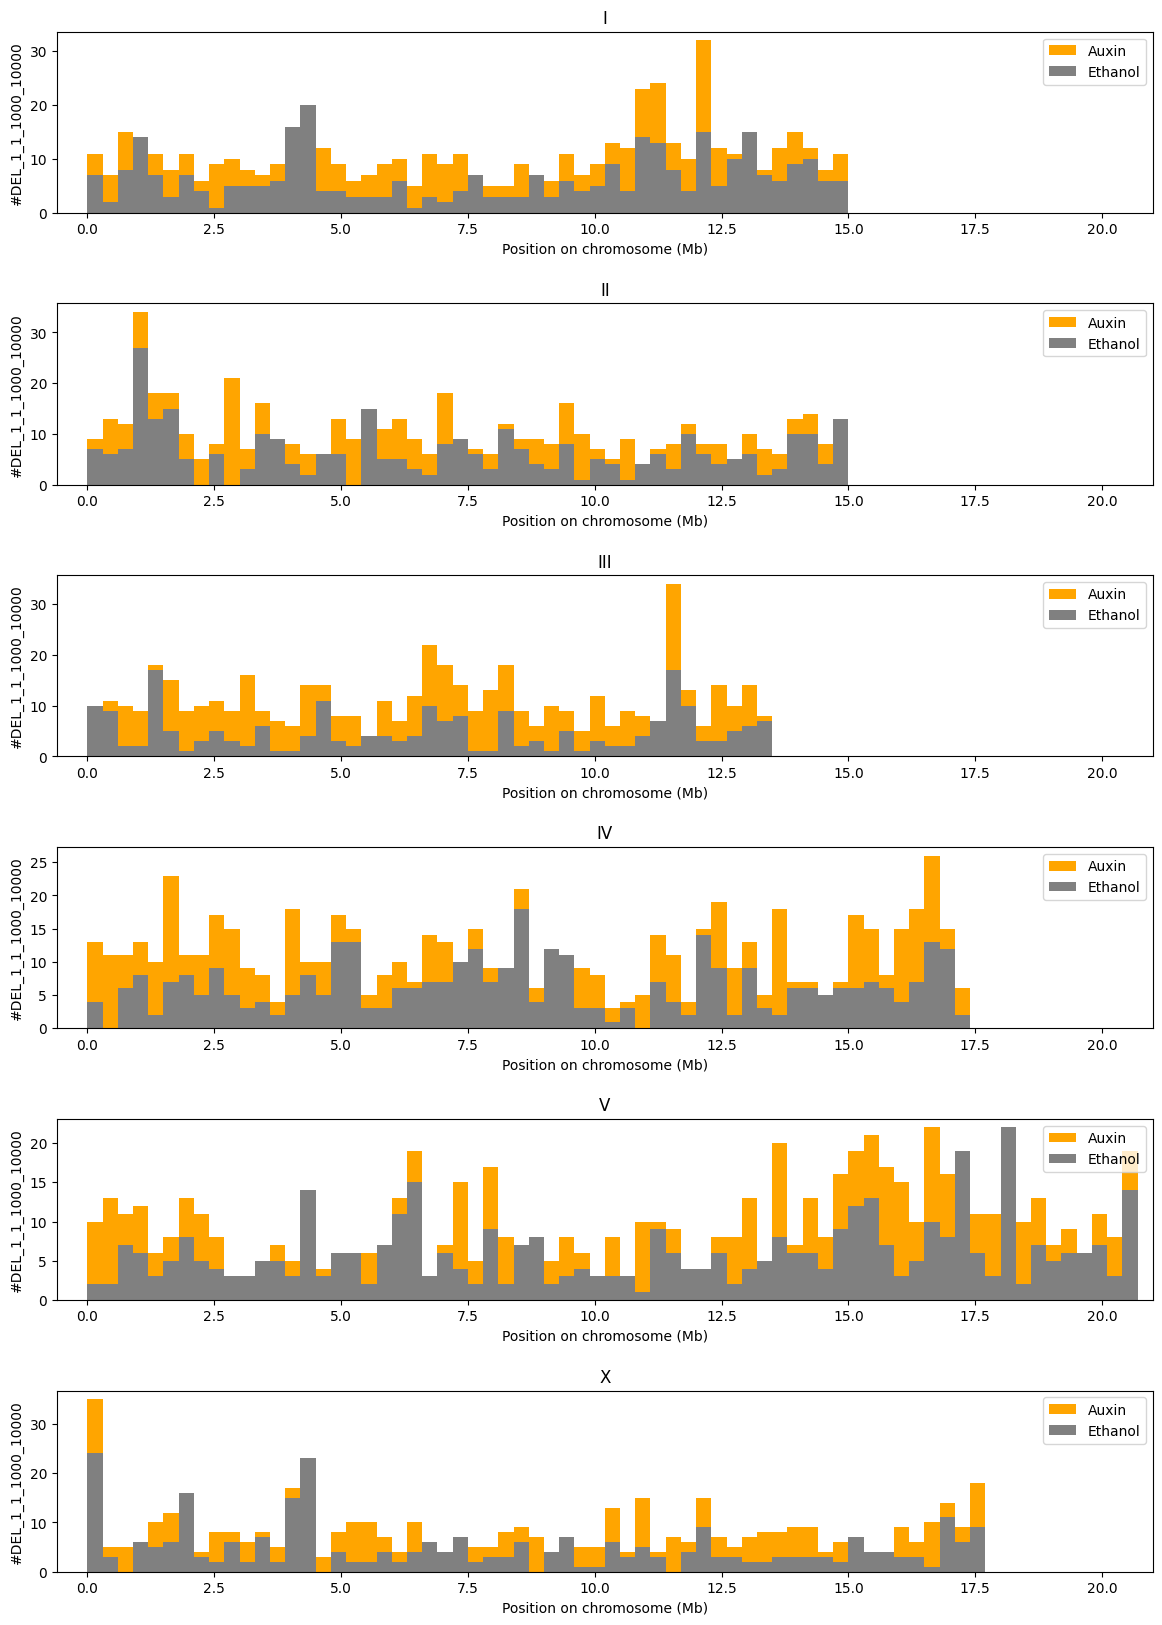

In [ ]:
# Filter VCF data
vcf_mutant_filtered = filter_vcf("alignment_315850_"+SV_tool_arg.value+".vcf", SV_tool_arg.value, SV_type_arg.value, min_depth_arg.value, max_depth_arg.value, SV_length_min_arg.value, SV_length_max_arg.value, 'vcf_mutant')
vcf_control_filtered = filter_vcf("alignment_315848_"+SV_tool_arg.value+".vcf", SV_tool_arg.value, SV_type_arg.value, min_depth_arg.value, max_depth_arg.value, SV_length_min_arg.value, SV_length_max_arg.value, 'vcf_wildtype')

# Initialize parameters
chr_len = chr_length
vcf1 = vcf_mutant_filtered
vcf2 = vcf_control_filtered
y_label = SV_type_arg.value+"_"+min_depth_arg.value+"_"+max_depth_arg.value+"_"+SV_length_min_arg.value+"_"+SV_length_max_arg.value

# Prepare figure
fig = plt.figure(figsize=(14.14, 20))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

# Create data structure to save histogram counts
histogram_data = {}

from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    return f'{x/1e6:.1f}'

# Plot histograms and store data
chromosomes = ['I', 'II', 'III', 'IV', 'V', 'X']
for i, chrom in enumerate(chromosomes, start=1):
    plt.subplot(6, 1, i)
    bins = np.arange(0, chr_len[chr_len[0] == chrom][4].iloc[0], 300000)
    mutant_hist, mutant_edges, _ = plt.hist(vcf1[vcf1[0] == chrom][1], bins=bins, label='Auxin', color='orange')
    control_hist, control_edges, _ = plt.hist(vcf2[vcf2[0] == chrom][1], bins=bins, label='Ethanol', color='grey')

    plt.legend(loc='upper right')
    plt.ylabel('#' + y_label)
    plt.xlabel("Position on chromosome (Mb)")
    plt.title(chrom)
    plt.xlim(xmin=-0.6 * 10**6, xmax=21 * 10**6)

    ax = plt.gca()  # Get current axis
    ax.xaxis.set_major_formatter(FuncFormatter(millions))  # Apply formatter

    # Store histogram data for this chromosome
    histogram_data[chrom] = {
        'bin_start': mutant_edges[:-1].tolist(),
        'bin_end': mutant_edges[1:].tolist(),
        'mutant_count': mutant_hist.tolist(),
        'control_count': control_hist.tolist()
    }

# Save plot
plot_filename = SV_tool_arg.value+"_"+SV_type_arg.value+"_"+min_depth_arg.value+"_"+max_depth_arg.value+"_"+SV_length_min_arg.value+"_"+SV_length_max_arg.value+".png"
plt.savefig(plot_filename, bbox_inches='tight', dpi=500)

# Save histogram data to a text file
data_filename = plot_filename.replace('.png', '.txt')
with open(data_filename, 'w') as f:
    f.write("Chromosome\tBin Start\tBin End\tMutant Count\tControl Count\n")
    for chrom, data in histogram_data.items():
        for i in range(len(data['bin_start'])):
            f.write(f"{chrom}\t{data['bin_start'][i]}\t{data['bin_end'][i]}\t{data['mutant_count'][i]}\t{data['control_count'][i]}\n")

In [ ]:
#@title Specify the parameters for multiple length windows to make fancy boxplots
SV_tool_arg_2 = widgets.Dropdown(
    options=['cuteSV', 'sniffles'],
    value='cuteSV',
    description='SV calling tool:',style={'description_width': 'initial'},layout={'width': 'max-content'}
)
display(SV_tool_arg_2)
SV_type_arg_2 = widgets.Dropdown(
    options=['DEL', 'DUP', 'INS','INV'],
    value='DEL',
    description='SV TYPE:',style={'description_width': 'initial'},layout={'width': 'max-content'}
)
display(SV_type_arg_2)
min_depth_arg_2=widgets.Text(
    value='1',
    placeholder='Type a number',
    description='Minimum depth:',
    disabled=False,style={'description_width': 'initial'},layout={'width': 'max-content'}
)
display(min_depth_arg_2)
max_depth_arg_2=widgets.Text(
    value='1',
    placeholder='Type a number',
    description='Maximum depth:',
    disabled=False,style={'description_width': 'initial'},layout={'width': 'max-content'}
)
display(max_depth_arg_2)
SV_length_min_arg_w1=widgets.Text(
    value='1000',
    placeholder='Type a number',
    description='Minimum length window 1:',
    disabled=False,style={'description_width': 'initial'},layout={'width': 'max-content'}
)
display(SV_length_min_arg_w1)
SV_length_max_arg_w1=widgets.Text(
    value='10000',
    placeholder='Type a number',
    description='Maximum length window 1:',style={'description_width': 'initial'},layout={'width': 'max-content'}
)
display(SV_length_max_arg_w1)
SV_length_min_arg_w2=widgets.Text(
    value='10000',
    placeholder='Type a number',
    description='Mininimum length window 2:',
    disabled=False,style={'description_width': 'initial'},layout={'width': 'max-content'}
)
display(SV_length_min_arg_w2)
SV_length_max_arg_w2=widgets.Text(
    value='50000',
    placeholder='Type a number',
    description='Maximum length window 2:',style={'description_width': 'initial'},layout={'width': 'max-content'}
)
display(SV_length_max_arg_w2)
SV_length_min_arg_w3=widgets.Text(
    value='50000',
    placeholder='Type a number',
    description='Minimum length window 3:',
    disabled=False,style={'description_width': 'initial'},layout={'width': 'max-content'}
)
display(SV_length_min_arg_w3)
SV_length_max_arg_w3=widgets.Text(
    value='100000',
    placeholder='Type a number',
    description='Maximum length window 3:',style={'description_width': 'initial'},layout={'width': 'max-content'}
)
display(SV_length_max_arg_w3)
print("You can specify the parameters now!")

Dropdown(description='SV calling tool:', layout=Layout(width='max-content'), options=('cuteSV', 'sniffles'), s…

Dropdown(description='SV TYPE:', layout=Layout(width='max-content'), options=('DEL', 'DUP', 'INS', 'INV'), sty…

Text(value='1', description='Minimum depth:', layout=Layout(width='max-content'), placeholder='Type a number',…

Text(value='1', description='Maximum depth:', layout=Layout(width='max-content'), placeholder='Type a number',…

Text(value='1000', description='Minimum length window 1:', layout=Layout(width='max-content'), placeholder='Ty…

Text(value='10000', description='Maximum length window 1:', layout=Layout(width='max-content'), placeholder='T…

Text(value='10000', description='Mininimum length window 2:', layout=Layout(width='max-content'), placeholder=…

Text(value='50000', description='Maximum length window 2:', layout=Layout(width='max-content'), placeholder='T…

Text(value='50000', description='Minimum length window 3:', layout=Layout(width='max-content'), placeholder='T…

Text(value='100000', description='Maximum length window 3:', layout=Layout(width='max-content'), placeholder='…

You can specify the parameters now!


In [ ]:
#@title Plot boxplots (takes less than 5 minutes)
vcf_mutant_filtered_w1=filter_vcf("alignment_315850_"+SV_tool_arg_2.value+".vcf",SV_tool_arg_2.value,SV_type_arg_2.value,min_depth_arg_2.value,max_depth_arg_2.value,SV_length_min_arg_w1.value,SV_length_max_arg_w1.value,'vcf_mutant')
vcf_control_filtered_w1=filter_vcf("alignment_315848_"+SV_tool_arg_2.value+".vcf",SV_tool_arg_2.value,SV_type_arg_2.value,min_depth_arg_2.value,max_depth_arg_2.value,SV_length_min_arg_w1.value,SV_length_max_arg_w1.value,'vcf_wildtype')
vcf_mutant_filtered_w2=filter_vcf("alignment_315850_"+SV_tool_arg_2.value+".vcf",SV_tool_arg_2.value,SV_type_arg_2.value,min_depth_arg_2.value,max_depth_arg_2.value,SV_length_min_arg_w2.value,SV_length_max_arg_w2.value,'vcf_mutant')
vcf_control_filtered_w2=filter_vcf("alignment_315848_"+SV_tool_arg_2.value+".vcf",SV_tool_arg_2.value,SV_type_arg_2.value,min_depth_arg_2.value,max_depth_arg_2.value,SV_length_min_arg_w2.value,SV_length_max_arg_w2.value,'vcf_wildtype')
vcf_mutant_filtered_w3=filter_vcf("alignment_315850_"+SV_tool_arg_2.value+".vcf",SV_tool_arg_2.value,SV_type_arg_2.value,min_depth_arg_2.value,max_depth_arg_2.value,SV_length_min_arg_w3.value,SV_length_max_arg_w3.value,'vcf_mutant')
vcf_control_filtered_w3=filter_vcf("alignment_315848_"+SV_tool_arg_2.value+".vcf",SV_tool_arg_2.value,SV_type_arg_2.value,min_depth_arg_2.value,max_depth_arg_2.value,SV_length_min_arg_w3.value,SV_length_max_arg_w3.value,'vcf_wildtype')
plt.figure(figsize=(12, 5))

plt.subplots_adjust(wspace=0.25, hspace=0.2)

# Plot for window 1
plt.subplot(1, 3, 1)
plot_data_w1 = [
    get_values(vcf_control_filtered_w1, vcf_mutant_filtered_w1, chr_length)[1],  # Ethanol first
    get_values(vcf_control_filtered_w1, vcf_mutant_filtered_w1, chr_length)[0],  # Auxin second
]
sns.boxplot(
    data=plot_data_w1,
    showfliers=True,
    palette=['grey', 'orange'],  # Ethanol and Auxin
    notch=True
)
plt.xticks([0, 1], ['Ethanol', 'Auxin'])
plt.title(f"{SV_type_arg_2.value}_{min_depth_arg_2.value}_{max_depth_arg_2.value}_{SV_length_min_arg_w1.value}_{SV_length_max_arg_w1.value}")
plt.ylabel(f"#{SV_type_arg_2.value} in 300,000 bp windows")
plt.ylim(ymax=max(plot_data_w1[0]) + 3)  # Take maximum from Auxin data
plt.text(
    0.5,
    max(plot_data_w1[0]) + 1,
    convert_pvalue_to_asterisks(
        ranksums(
            get_values(vcf_mutant_filtered_w1, vcf_control_filtered_w1, chr_length)[1],  # Original test order
            get_values(vcf_mutant_filtered_w1, vcf_control_filtered_w1, chr_length)[0],
            alternative='less'
        ).pvalue
    ),
    fontsize=12,
    fontweight='bold',
    va='top'
)

# Plot for window 2
plt.subplot(1, 3, 2)
plot_data_w2 = [
    get_values(vcf_control_filtered_w2, vcf_mutant_filtered_w2, chr_length)[1],  # Ethanol first
    get_values(vcf_control_filtered_w2, vcf_mutant_filtered_w2, chr_length)[0],  # Auxin second
]
sns.boxplot(
    data=plot_data_w2,
    showfliers=True,
    palette=['grey', 'orange'],
    notch=True
)
plt.xticks([0, 1], ['Ethanol', 'Auxin'])
plt.title(f"{SV_type_arg_2.value}_{min_depth_arg_2.value}_{max_depth_arg_2.value}_{SV_length_min_arg_w2.value}_{SV_length_max_arg_w2.value}")
plt.ylabel(f"#{SV_type_arg_2.value} in 300,000 bp windows")
plt.ylim(ymax=max(plot_data_w2[0]) + 3)  # Take maximum from Auxin data
plt.text(
    0.5,
    max(plot_data_w2[0]) + 1,
    convert_pvalue_to_asterisks(
        ranksums(
            get_values(vcf_mutant_filtered_w2, vcf_control_filtered_w2, chr_length)[1],  # Original test order
            get_values(vcf_mutant_filtered_w2, vcf_control_filtered_w2, chr_length)[0],
            alternative='less'
        ).pvalue
    ),
    fontsize=12,
    fontweight='bold',
    va='top'
)

# Plot for window 3
plt.subplot(1, 3, 3)
plot_data_w3 = [
    get_values(vcf_control_filtered_w3, vcf_mutant_filtered_w3, chr_length)[1],  # Ethanol first
    get_values(vcf_control_filtered_w3, vcf_mutant_filtered_w3, chr_length)[0],  # Auxin second
]
sns.boxplot(
    data=plot_data_w3,
    showfliers=True,
    palette=['grey', 'orange'],
    notch=True
)
plt.xticks([0, 1], ['Ethanol', 'Auxin'])
plt.title(f"{SV_type_arg_2.value}_{min_depth_arg_2.value}_{max_depth_arg_2.value}_{SV_length_min_arg_w3.value}_{SV_length_max_arg_w3.value}")
plt.ylabel(f"#{SV_type_arg_2.value} in 300,000 bp windows")
plt.ylim(ymax=max(plot_data_w3[0]) + 3)  # Take maximum from Auxin data
plt.text(
    0.5,
    max(plot_data_w3[0]) + 1,
    convert_pvalue_to_asterisks(
        ranksums(
            get_values(vcf_mutant_filtered_w3, vcf_control_filtered_w3, chr_length)[1],  # Original test order
            get_values(vcf_mutant_filtered_w3, vcf_control_filtered_w3, chr_length)[0],
            alternative='less'
        ).pvalue
    ),
    fontsize=12,
    fontweight='bold',
    va='top'
)

# Save the figure
plt.savefig(
    f"boxplot_{SV_tool_arg_2.value}_{SV_type_arg_2.value}_{min_depth_arg_2.value}_{max_depth_arg_2.value}_{SV_length_min_arg_w1.value}_{SV_length_max_arg_w1.value}_{SV_length_min_arg_w2.value}_{SV_length_max_arg_w2.value}_{SV_length_min_arg_w3.value}_{SV_length_max_arg_w3.value}.png",
    bbox_inches='tight',
    dpi=500
)

import csv

# Collect p-values for each window
p_values = []

# Window 1
p_value_w1 = ranksums(
    get_values(vcf_mutant_filtered_w1, vcf_control_filtered_w1, chr_length)[1],
    get_values(vcf_mutant_filtered_w1, vcf_control_filtered_w1, chr_length)[0],
    alternative='less'
).pvalue
p_values.append([SV_length_min_arg_w1.value, SV_length_max_arg_w1.value, p_value_w1])

# Window 2
p_value_w2 = ranksums(
    get_values(vcf_mutant_filtered_w2, vcf_control_filtered_w2, chr_length)[1],
    get_values(vcf_mutant_filtered_w2, vcf_control_filtered_w2, chr_length)[0],
    alternative='less'
).pvalue
p_values.append([SV_length_min_arg_w2.value, SV_length_max_arg_w2.value, p_value_w2])

# Window 3
p_value_w3 = ranksums(
    get_values(vcf_mutant_filtered_w3, vcf_control_filtered_w3, chr_length)[1],
    get_values(vcf_mutant_filtered_w3, vcf_control_filtered_w3, chr_length)[0],
    alternative='less'
).pvalue
p_values.append([SV_length_min_arg_w3.value, SV_length_max_arg_w3.value, p_value_w3])

# Create a dynamic filename based on parameters
file_name = f"p_values_{SV_tool_arg_2.value}_{SV_type_arg_2.value}_{min_depth_arg_2.value}_{max_depth_arg_2.value}_{SV_length_min_arg_w1.value}_{SV_length_max_arg_w1.value}_{SV_length_min_arg_w2.value}_{SV_length_max_arg_w2.value}_{SV_length_min_arg_w3.value}_{SV_length_max_arg_w3.value}.csv"

# Write p-values to CSV
with open(file_name, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['SV Length Min', 'SV Length Max', 'P-Value'])  # Header
    writer.writerows(p_values)  # Write p-value rows


In [ ]:
#@title Download VEP output (takes around 2 minutes)
!wget https://seafile.ist.ac.at/f/968d1118c02a432981c7/?dl=1 -O vcf_mutant_filtered_cuteSV_DUP_1_1_1000_10000.vcf_vep_output.txt
!wget https://seafile.ist.ac.at/f/053fcb60e1da40eebb96/?dl=1 -O vcf_mutant_filtered_cuteSV_DUP_1_1_10000_50000.vcf_vep_output.txt
!wget https://seafile.ist.ac.at/f/f1ac83f9efd24b92ae29/?dl=1 -O vcf_mutant_filtered_cuteSV_DUP_1_1_50000_100000.vcf_vep_output.txt
!wget https://seafile.ist.ac.at/f/c1c0b3a1b88547d19c6a/?dl=1 -O vcf_wildtype_filtered_cuteSV_DUP_1_1_1000_10000.vcf_vep_output.txt
!wget https://seafile.ist.ac.at/f/b09bfd1db28c4d8a9d66/?dl=1 -O vcf_wildtype_filtered_cuteSV_DUP_1_1_10000_50000.vcf_vep_output.txt
!wget https://seafile.ist.ac.at/f/721b0714a01c46e08a56/?dl=1 -O vcf_wildtype_filtered_cuteSV_DUP_1_1_50000_100000.vcf_vep_output.txt
!wget https://seafile.ist.ac.at/f/f6202b9b7aec4c65b79b/?dl=1 -O vcf_mutant_filtered_cuteSV_DUP_1_2_1000_10000.vcf_vep_output.txt
!wget https://seafile.ist.ac.at/f/c8ce1791d7af4e999089/?dl=1 -O vcf_mutant_filtered_cuteSV_DUP_1_2_10000_50000.vcf_vep_output.txt
!wget https://seafile.ist.ac.at/f/17537fd0c65b492fb6ce/?dl=1 -O vcf_mutant_filtered_cuteSV_DUP_1_2_50000_100000.vcf_vep_output.txt
!wget https://seafile.ist.ac.at/f/91dc0d51dcd74e089bb1/?dl=1 -O vcf_wildtype_filtered_cuteSV_DUP_1_2_1000_10000.vcf_vep_output.txt
!wget https://seafile.ist.ac.at/f/f2ba3e083d04438ba8c8/?dl=1 -O vcf_wildtype_filtered_cuteSV_DUP_1_2_10000_50000.vcf_vep_output.txt
!wget https://seafile.ist.ac.at/f/12ff3cfad674492e98cf/?dl=1 -O vcf_wildtype_filtered_cuteSV_DUP_1_2_50000_100000.vcf_vep_output.txt
!wget https://seafile.ist.ac.at/f/864a52ef369e48848089/?dl=1 -O vcf_mutant_filtered_cuteSV_DEL_1_1_1000_10000.vcf_vep_output.txt
!wget https://seafile.ist.ac.at/f/e46d414bb55f4ffe8f68/?dl=1 -O vcf_mutant_filtered_cuteSV_DEL_1_1_10000_50000.vcf_vep_output.txt
!wget https://seafile.ist.ac.at/f/437979c260a74fdc9100/?dl=1 -O vcf_mutant_filtered_cuteSV_DEL_1_1_50000_100000.vcf_vep_output.txt
!wget https://seafile.ist.ac.at/f/7048972d312d47e2bc86/?dl=1 -O vcf_wildtype_filtered_cuteSV_DEL_1_1_1000_10000.vcf_vep_output.txt
!wget https://seafile.ist.ac.at/f/31a99abf39044b9dbaf0/?dl=1 -O vcf_wildtype_filtered_cuteSV_DEL_1_1_10000_50000.vcf_vep_output.txt
!wget https://seafile.ist.ac.at/f/ad1e5e880dbe40018c76/?dl=1 -O vcf_wildtype_filtered_cuteSV_DEL_1_1_50000_100000.vcf_vep_output.txt
!wget https://seafile.ist.ac.at/f/d65e3cac15274871bded/?dl=1 -O vcf_mutant_filtered_cuteSV_DEL_1_2_1000_10000.vcf_vep_output.txt
!wget https://seafile.ist.ac.at/f/037c3edbf8514385a053/?dl=1 -O vcf_mutant_filtered_cuteSV_DEL_1_2_10000_50000.vcf_vep_output.txt
!wget https://seafile.ist.ac.at/f/c22b381f1970466db905/?dl=1 -O vcf_mutant_filtered_cuteSV_DEL_1_2_50000_100000.vcf_vep_output.txt
!wget https://seafile.ist.ac.at/f/6a71cb84d21942ba9a05/?dl=1 -O vcf_wildtype_filtered_cuteSV_DEL_1_2_1000_10000.vcf_vep_output.txt
!wget https://seafile.ist.ac.at/f/d09c2de7d7424a649e30/?dl=1 -O vcf_wildtype_filtered_cuteSV_DEL_1_2_10000_50000.vcf_vep_output.txt
!wget https://seafile.ist.ac.at/f/e127dd07e253480abee6/?dl=1 -O vcf_wildtype_filtered_cuteSV_DEL_1_2_50000_100000.vcf_vep_output.txt
for i in range(5):
    clear_output(wait=True)
    print("Finished downloading vep files!")

In [ ]:
#@title load function for plotting
def plot_vep_results(mutant_file_name_vep,control_file_name_vep):
  with open(mutant_file_name_vep) as oldfile, open(mutant_file_name_vep+'.temp', 'w') as newfile:
      for line in oldfile:
        line = "" if "##" in line or not line else line
        newfile.write(line)
  with open(control_file_name_vep) as oldfile, open(control_file_name_vep+'.temp', 'w') as newfile:
      for line in oldfile:
        line = "" if "##" in line or not line else line
        newfile.write(line)
  vep_mutant=pd.read_csv(mutant_file_name_vep+'.temp',sep="\t")#,header=None)
  vep_control=pd.read_csv(control_file_name_vep+'.temp',sep="\t")#,header=None)
  vep_mutant_consequence=vep_mutant['Consequence'].str.split(',').explode().value_counts().reset_index()#.set_index('Consequence').plot(kind='bar', stacked=True)
  vep_mutant_consequence['percentage']=(vep_mutant_consequence['count']/vep_mutant_consequence['count'].sum())*100
  vep_control_consequence=vep_control['Consequence'].str.split(',').explode().value_counts().reset_index()
  vep_control_consequence['percentage']=(vep_control_consequence['count']/vep_control_consequence['count'].sum())*100
  merged_vep=pd.merge(vep_mutant_consequence[['Consequence','percentage','count']],vep_control_consequence[['Consequence','percentage','count']],on='Consequence',how='outer').fillna(0).set_index('Consequence')
  #merged_vep_filtered=merged_vep[(merged_vep['percentage_x']>0.5)&(merged_vep['percentage_y']>0.5)]
  #new_row = pd.DataFrame({"Consequence": ["other"], "percentage_x": [merged_vep[(merged_vep['percentage_x']<0.5)&(merged_vep['percentage_y']<0.5)]['percentage_x'].sum()],"percentage_y":[merged_vep[(merged_vep['percentage_x']<0.5)&(merged_vep['percentage_y']<0.5)]['percentage_y'].sum()],"count_x": [merged_vep[(merged_vep['percentage_x']<0.5)&(merged_vep['percentage_y']<0.5)]['count_x'].sum()],"count_y": [merged_vep[(merged_vep['percentage_x']<0.5)&(merged_vep['percentage_y']<0.5)]['percentage_y'].sum()]}).set_index('Consequence')
  #merged_vep_filtered_2 = pd.concat([merged_vep_filtered, new_row])#, ignore_index=True)
  os.remove(control_file_name_vep+'.temp')
  os.remove(mutant_file_name_vep+'.temp')
  return merged_vep #_filtered_2

In [ ]:
#@title Specify the parameters after you see the message: You can specify the parameters now!
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        print("changed to %s" % change['new'])
SV_tool_arg_3 = widgets.Dropdown(
    options=['cuteSV'],
    value='cuteSV',
    description='SV calling tool:',style={'description_width': 'initial'}
)
SV_tool_arg_3.observe(on_change)
display(SV_tool_arg_3)
SV_type_arg_3 = widgets.Dropdown(
    options=['DEL', 'DUP'],
    value='DEL',
    description='SV TYPE:',style={'description_width': 'initial'}
)
display(SV_type_arg_3)
SV_type_arg_3.observe(on_change)
min_depth_arg_3 = widgets.Dropdown(
    options=['1'],
    value='1',
    description='minimum depth:',style={'description_width': 'initial'}
)
display(min_depth_arg_3)
min_depth_arg_3.observe(on_change)
max_depth_arg_3 = widgets.Dropdown(
    options=['1','2'],
    value='1',
    description='maximum depth:',style={'description_width': 'initial'}
)
display(max_depth_arg_3)
min_depth_arg_3.observe(on_change)
SV_length_arg_3=widgets.Dropdown(
    options=['1000_10000','10000_50000','50000_100000'],
    value='1000_10000',
    description='SV length:',style={'description_width': 'initial'}
)
display(SV_length_arg_3)
SV_length_arg_3.observe(on_change)
print("You can specify the parameters now!")

In [ ]:
#@title Plot the distribution of variants and their counts (takes less than a minute)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
def gen_colors(df):
    col_d = {'3_prime_UTR_variant': "#e6194B", '5_prime_UTR_variant': "#3cb44b", 'coding_sequence_variant': "#ffe119", 'downstream_gene_variant': "#4363d8", 'frameshift_variant': "#f58231", 'inframe_deletion': "#911eb4", 'intergenic_variant': "#42d4f4", 'intron_variant': "#f032e6", 'non_coding_transcript_exon_variant': "#bfef45", 'non_coding_transcript_variant': "#fabed4", 'protein_altering_variant':"#469990", 'splice_acceptor_variant': "#dcbeff", 'splice_donor_5th_base_variant': "#9A6324", 'splice_donor_region_variant': "#9A6324", 'splice_donor_variant': "#fffac8", 'splice_polypyrimidine_tract_variant': "#800000", 'splice_region_variant': "#aaffc3", 'start_lost': "#808000", 'stop_gained':"#ffd8b1", 'stop_lost': "#000075", 'stop_retained_variant': "#a9a9a9", 'transcript_ablation': "#000000", 'upstream_gene_variant':'darkblue', 'transcript_amplification':'#000000', 'feature_elongation':'lightblue', 'start_retained_variant':'white'}
    return [col_d[col] for col in df.columns]
# generate some data
x = np.arange(0, 10, 0.2)
y = np.sin(x)

# plot it
fig = plt.figure(figsize=(15, 20))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
gs = gridspec.GridSpec(2, 1)#, width_ratios=[1, 3])
ax0 = plt.subplot(gs[0])
plot_vep_results('vcf_mutant_filtered_'+SV_tool_arg_3.value+'_'+SV_type_arg_3.value+'_'+min_depth_arg_3.value+'_'+max_depth_arg_3.value+'_'+SV_length_arg_3.value+'.vcf_vep_output.txt','vcf_wildtype_filtered_'+SV_tool_arg_3.value+'_'+SV_type_arg_3.value+'_'+min_depth_arg_3.value+'_'+max_depth_arg_3.value+'_'+SV_length_arg_3.value+'.vcf_vep_output.txt')[['percentage_x','percentage_y']].sort_index().T.plot(kind='barh', stacked=True,ax=ax0,color=gen_colors(plot_vep_results('vcf_mutant_filtered_'+SV_tool_arg_3.value+'_'+SV_type_arg_3.value+'_'+min_depth_arg_3.value+'_'+max_depth_arg_3.value+'_'+SV_length_arg_3.value+'.vcf_vep_output.txt','vcf_wildtype_filtered_'+SV_tool_arg_3.value+'_'+SV_type_arg_3.value+'_'+min_depth_arg_3.value+'_'+max_depth_arg_3.value+'_'+SV_length_arg_3.value+'.vcf_vep_output.txt')[['percentage_x','percentage_y']].sort_index().T)).legend(
    bbox_to_anchor=(-0.08, 0.8),
    fontsize=11)
ax0.set_yticks([0,1],["mutant","control"])
ax0.set_xlabel("percentage of variant effects")
ax0.text(-15, 1.7, SV_tool_arg_3.value+'_'+SV_type_arg_3.value+'_'+min_depth_arg_3.value+'_'+max_depth_arg_3.value+'_'+SV_length_arg_3.value, fontsize=25)
ax1 = plt.subplot(gs[1])
plot_vep_results('vcf_mutant_filtered_'+SV_tool_arg_3.value+'_'+SV_type_arg_3.value+'_'+min_depth_arg_3.value+'_'+max_depth_arg_3.value+'_'+SV_length_arg_3.value+'.vcf_vep_output.txt','vcf_wildtype_filtered_'+SV_tool_arg_3.value+'_'+SV_type_arg_3.value+'_'+min_depth_arg_3.value+'_'+max_depth_arg_3.value+'_'+SV_length_arg_3.value+'.vcf_vep_output.txt')[['count_x','count_y']].sort_index().plot(kind='barh',ax=ax1,legend=True)
ax1.set_xlabel("Number of variants")
ax1.legend(["Mutant", "Control"]);
plt.savefig('VEP'+SV_tool_arg_3.value+'_'+SV_type_arg_3.value+'_'+min_depth_arg_3.value+'_'+max_depth_arg_3.value+'_'+SV_length_arg_3.value+".png",bbox_inches='tight',dpi=500)



# Call plot_vep_results to get the data
data = plot_vep_results(
    f'vcf_mutant_filtered_{SV_tool_arg_3.value}_{SV_type_arg_3.value}_'
    f'{min_depth_arg_3.value}_{max_depth_arg_3.value}_{SV_length_arg_3.value}.vcf_vep_output.txt',
    f'vcf_wildtype_filtered_{SV_tool_arg_3.value}_{SV_type_arg_3.value}_'
    f'{min_depth_arg_3.value}_{max_depth_arg_3.value}_{SV_length_arg_3.value}.vcf_vep_output.txt'
)

# Extract relevant columns for percentage and counts
data_to_save = data[['percentage_x', 'percentage_y', 'count_x', 'count_y']].reset_index()
data_to_save.columns = ['Class', 'Percentage_Mutant', 'Percentage_Control', 'Count_Mutant', 'Count_Control']

# Create the filename dynamically
filename = (
    f'Variant_Distribution_{SV_tool_arg_3.value}_{SV_type_arg_3.value}_'
    f'{min_depth_arg_3.value}_{max_depth_arg_3.value}_{SV_length_arg_3.value}.csv'
)

# Save to CSV
data_to_save.to_csv(filename, index=False)
print(f"Data saved to CSV: {filename}")

In [ ]:
#@title Chi2_contigency (under development)
#import numpy as np
#from scipy.stats import chi2_contingency
#table = np.array([[VEP_result[VEP_result['Consequence']=='coding_sequence_variant,3_prime_UTR_variant,intron_variant']['percentage_x'],VEP_result[VEP_result['Consequence']=='coding_sequence_variant,3_prime_UTR_variant,intron_variant']['percentage_y']], [100-VEP_result[VEP_result['Consequence']=='coding_sequence_variant,3_prime_UTR_variant,intron_variant']['percentage_x'],100-VEP_result[VEP_result['Consequence']=='coding_sequence_variant,3_prime_UTR_variant,intron_variant']['percentage_y']]])
#table = np.array([[VEP_result[VEP_result['Consequence']=='transcript_amplification']['percentage_x'],VEP_result[VEP_result['Consequence']=='transcript_amplification']['percentage_y']], [100-VEP_result[VEP_result['Consequence']=='transcript_amplification']['percentage_x'],100-VEP_result[VEP_result['Consequence']=='transcript_amplification']['percentage_y']]])
#res = chi2_contingency(table)
#res.pvalue


In [ ]:
# Extract data for Chi-square contingency test
data_mutant = plot_vep_results(
    f'vcf_mutant_filtered_{SV_tool_arg_3.value}_{SV_type_arg_3.value}_'
    f'{min_depth_arg_3.value}_{max_depth_arg_3.value}_{SV_length_arg_3.value}.vcf_vep_output.txt',
    f'vcf_wildtype_filtered_{SV_tool_arg_3.value}_{SV_type_arg_3.value}_'
    f'{min_depth_arg_3.value}_{max_depth_arg_3.value}_{SV_length_arg_3.value}.vcf_vep_output.txt'
)[['count_x']].rename(columns={'count_x': 'Mutant'})

data_control = plot_vep_results(
    f'vcf_mutant_filtered_{SV_tool_arg_3.value}_{SV_type_arg_3.value}_'
    f'{min_depth_arg_3.value}_{max_depth_arg_3.value}_{SV_length_arg_3.value}.vcf_vep_output.txt',
    f'vcf_wildtype_filtered_{SV_tool_arg_3.value}_{SV_type_arg_3.value}_'
    f'{min_depth_arg_3.value}_{max_depth_arg_3.value}_{SV_length_arg_3.value}.vcf_vep_output.txt'
)[['count_y']].rename(columns={'count_y': 'Control'})

# Combine mutant and control data
contingency_table = pd.concat([data_mutant, data_control], axis=1)
contingency_table.fillna(0, inplace=True)

# Perform Chi-square tests
results = pd.DataFrame(columns=['Class', 'Mutant', 'Control', 'Chi2', 'p-value', 'Significant'])

for index, row in contingency_table.iterrows():
    observed = [row['Mutant'], row['Control']]
    total = sum(observed)

    # Avoid division by zero in expected calculation
    if total == 0:
        continue

    # Expected counts based on proportions
    expected = [total / 2, total / 2]

    # Perform Chi-square test
    chi2, p, _, _ = scipy.stats.chi2_contingency([observed, expected])

    # Add results to the DataFrame
    results = pd.concat([results, pd.DataFrame({
        'Class': [index],
        'Mutant': [row['Mutant']],
        'Control': [row['Control']],
        'Chi2': [chi2],
        'p-value': [p],
        'Significant': [p < 0.05]
    })], ignore_index=True)

# Constructing the file name dynamically based on parameters
file_name = f"pairwise_test_results_{SV_tool_arg_3.value}_{SV_type_arg_3.value}_" \
            f"{min_depth_arg_3.value}_{max_depth_arg_3.value}_{SV_length_arg_3.value}.csv"

# Save the results
results.to_csv(file_name, index=False)
print(f"\nPairwise test results saved as '{file_name}'.")

# Output results for verification
print(results)